# In this script you can load and visualize your results
For any questions regarding this or any other notebook on this git you can contact me at e.lems@student.ru.nl

In [2]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
import os
import sklearn as sk
from scipy.io import loadmat
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.interpolate import griddata
from sklearn.cross_decomposition import CCA
from scipy import stats
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests

import timeit
import math

## Loading results
Here you load your results

In [3]:
lda_cca = np.load('Results/Cross validatie LDA CCA.npy')
lda_cherry = np.load('Results/Cross validatie LDA cherry.npy')
mdm_cca = np.load('Results/Cross validatie MDM CCA.npy')
mdm_cherry = np.load('Results/Cross validatie MDM cherry.npy')
print(lda_cca.shape)

(30, 10)


## Here you establish some basic parameters

In [4]:
n_subjects = 30
train_test_size = 80
n_folds = 10

## Average, grand average and standard deviation
here you compute the average, grand average and standard deviation.

In [5]:
average_lda_cca_subjects = np.mean(lda_cca, axis=1)
average_lda_cherry_subjects = np.mean(lda_cherry, axis=1)
average_mdm_cca_subjects = np.mean(mdm_cca, axis=1)
average_mdm_cherry_subjects = np.mean(mdm_cherry, axis=1)


grand_average_lda_cca = np.mean(average_lda_cca_subjects)
grand_average_lda_cherry = np.mean(average_lda_cherry_subjects)
grand_average_mdm_cca = np.mean(average_mdm_cca_subjects)
grand_average_mdm_cherry = np.mean(average_mdm_cherry_subjects)

grand_std_lda_cca = np.std(average_lda_cca_subjects)
grand_std_lda_cherry = np.std(average_lda_cherry_subjects)
grand_std_mdm_cca = np.std(average_mdm_cca_subjects)
grand_std_mdm_cherry = np.std(average_mdm_cherry_subjects)





print('Grand average LDA CCA:\n {0:.2f}'.format(grand_average_lda_cca))
print('Grand average LDA cherry picking:\n {0:.2f}'.format(grand_average_lda_cherry))
print('Grand average MDM CCA:\n {0:.2f}'.format(grand_average_mdm_cca))
print('Grand average MDM cherry picking:\n {0:.2f}'.format(grand_average_mdm_cherry))
print('Standard deviation MDM cherry picking:\n {0:.2f}'.format(grand_std_mdm_cherry))
print('Standard deviation MDM CCA: \n {0:.2f}'.format(grand_std_mdm_cca))
print('Standard deviation LDA CCA: \n {0:.2f}'.format(grand_std_lda_cca))
print('Standard deviation LDA cherry picking: \n {0:.2f}'.format(grand_std_lda_cherry))


# for i in range(n_subjects):
#     print('Subject {}: {}'.format(i+1, average_mdm_cherry_subjects[i]))

Grand average LDA CCA:
 0.92
Grand average LDA cherry picking:
 0.87
Grand average MDM CCA:
 0.89
Grand average MDM cherry picking:
 0.83
Standard deviation MDM cherry picking:
 0.17
Standard deviation MDM CCA: 
 0.13
Standard deviation LDA CCA: 
 0.10
Standard deviation LDA cherry picking: 
 0.15


## Here you can make barplots

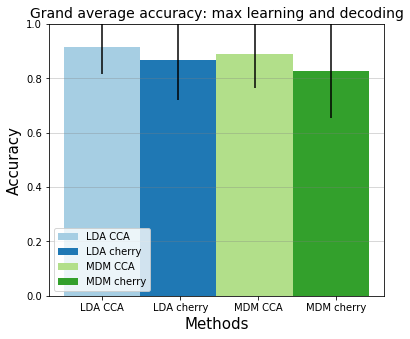

In [6]:
plt.figure(figsize=(6, 5))
width = 0.15
sns.set_palette('Paired')
x_ax = np.arange(1)
x_axa = np.arange(4)
plt.bar(x_ax,grand_average_lda_cca,width,label='LDA CCA',yerr=grand_std_lda_cca )
plt.bar(x_ax+width,grand_average_lda_cherry,width,label='LDA cherry', yerr= grand_std_lda_cherry)
plt.bar(x_ax+width+width,grand_average_mdm_cca,width,label='MDM CCA',yerr=grand_std_mdm_cca )
plt.bar(x_ax+width+width+width,grand_average_mdm_cherry,width,label='MDM cherry',yerr=grand_std_mdm_cherry )
plt.grid(color='grey', linestyle='-', linewidth=1,axis='y', alpha=0.3)
plt.xticks(x_axa/6.5,['LDA CCA', 'LDA cherry', 'MDM CCA', 'MDM cherry'])
plt.ylim([0,1])
plt.xlabel('Methods',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.legend(loc='lower left')
plt.title('Grand average accuracy: max learning and decoding',fontsize=14)
plt.savefig('average long.pdf',format='pdf' )
plt.show()

